<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/09_Cluster_Analysis_in_Python/03_K-Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. KMeans Clustering

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/comic_con.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
comic_con = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(comic_con.head())

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17,4,0.509349,0.090010,2
1,20,6,0.599234,0.135015,2
2,35,0,1.048660,0.000000,2
3,14,0,0.419464,0.000000,2
4,37,4,1.108583,0.090010,2


**K-means clustering: first exercise**  
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

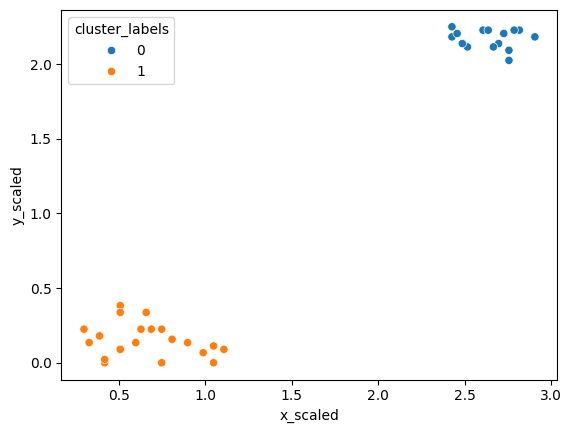

In [2]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

# Notice that the clusters formed are exactly the same as hierarchical clustering

**Runtime of k-means clustering**  
Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the kmeans() function on the FIFA dataset?

The data is stored in a pandas DataFrame, fifa. scaled_sliding_tackle and scaled_aggression are the relevant scaled columns. timeit and kmeans have been imported.

Cluster centers are defined through the kmeans() function. It has two required arguments: observations and number of clusters. You can use %timeit before a piece of code to check how long it takes to run. You can time the kmeans() function for three clusters on the fifa dataset.

-> ~ 100 ms (milliseconds)



**Elbow method on distinct clusters**  
Let us use the comic con dataset to see how the elbow plot looks on a dataset with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

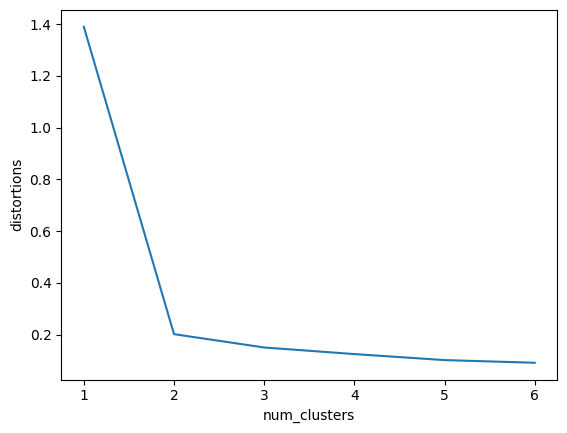

In [3]:
distortions = []
num_clusters = range(1, 7)

# Iterate over num_clusters to calculate distortions
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Elbow method on uniform data**  
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a dataset with uniformly distributed points. You may want to display the data points before proceeding with the exercise.

The data is stored in a pandas DataFrame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,39,3,2.376199,1.152237
1,42,7,2.558984,2.688554
2,58,3,3.533835,1.152237
3,43,3,2.619912,1.152237
4,13,6,0.792066,2.304475


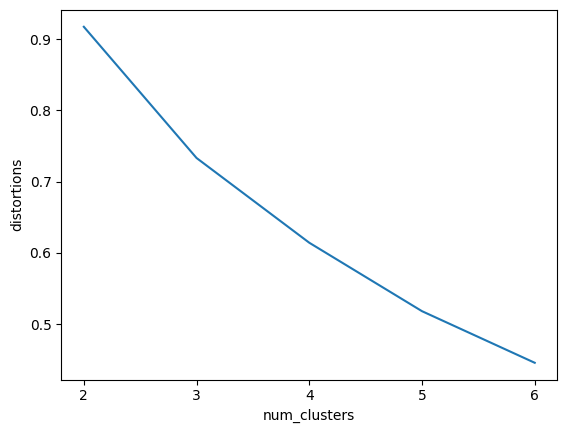

In [5]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/uniform_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
uniform_data = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(uniform_data.head())

distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# There is no well defined elbow in this plot!

### Limitations

**Impact of seeds on distinct clusters**  
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

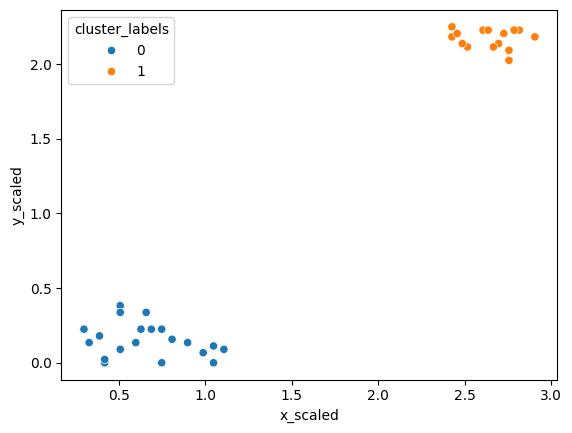

In [6]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

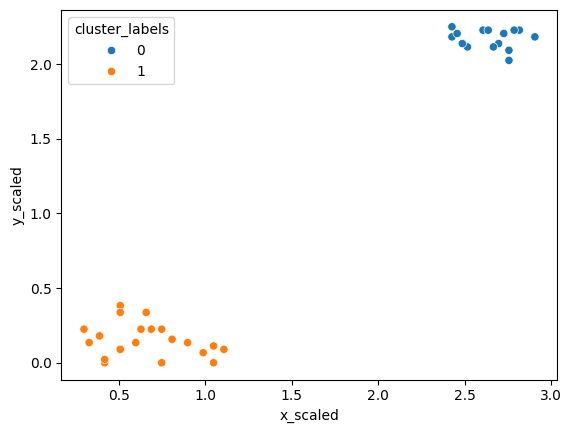

In [7]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

# Notice that the plots have not changed after changing the seed as the clusters are well-defined.

**Uniform clustering patterns**  
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.



,_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,33.875528,44.893421,2.209458,2.977524,2
1,38.208748,41.116327,2.492083,2.727011,2
2,35.740588,57.418006,2.331103,3.808208,1
3,32.546963,57.218082,2.122806,3.794948,1
4,62.063146,47.196944,4.047935,3.130303,2


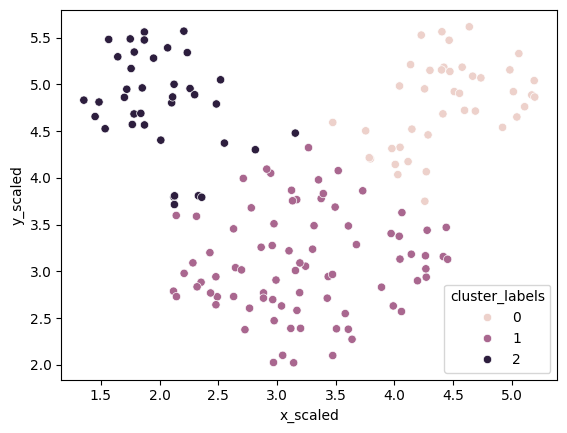

In [9]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/mouse.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
mouse = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(mouse.head())

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion =  kmeans(mouse[["x_scaled", "y_scaled"]], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[["x_scaled", "y_scaled"]], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = mouse)
plt.show()

# Notice that kmeans is unable to capture the three visible clusters clearly,
# and the two clusters towards the top have taken in some points along the boundary.
# This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

In [14]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/fifa_18_sample_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
fifa = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(fifa.head())
display(fifa.columns) # Display column names to identify the correct ones


# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x="scaled_def", y="scaled_phy", hue="cluster_labels", data=fifa)
plt.show()

#  Notice that the seed has an impact on clustering as the data is uniformly distributed.

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,NaN,NaN,NaN,NaN,2228,32,NaN,NaN,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,NaN,NaN,NaN,NaN,2158,30,NaN,NaN,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,NaN,NaN,NaN,NaN,2100,25,NaN,NaN,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,NaN,NaN,NaN,NaN,2291,30,NaN,NaN,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,NaN,NaN,NaN,NaN,1493,31,NaN,NaN,193.0,...,False,False,False,False,False,False,False,False,False,True


Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

KeyError: "None of [Index(['scaled_def', 'scaled_phy'], dtype='object')] are in the [columns]"